# Objectives
i) To identify patterns, associations, and potential risk factors among patients with non-communicable diseases (NCDs) in the MT_KENYA_NCDs dataset using statistical analysis.

ii) To apply unsupervised Hierarchical Clustering techniques to group NCD cases into distinct clusters based on shared characteristics, providing insights into co-occurring factors and patient profiles.


In [5]:
import pandas as pd

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')


In [7]:
data=pd.read_excel('Nyeri_NCDs_Data_CloudEMR_Facilities_as_at_August2024.xlsx')
data.head(5)

,MFLCode,FacilityName,CCCNumber,VisitDate,DOB,Age,Gender,ChronicIllness,ChronicOnsetDate,ChronicOnsetDate.1,...,systolic_pressure (mmhg),diastolic_pressure (mmhg),MedicalCover,OtherMedicalCover,MedicalCoverStatus,knownAllergies,AllergyCausativeAgent,AllergicReaction,AllergySeverity,Date_Created
0,10210,Gatei Dispensary,1021000094,2024-01-16,1962-02-06,62,F,Hypertension,NaN,NaN,...,162.0,104.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2024-01-16
1,10210,Gatei Dispensary,1021000094,2024-07-16,1962-02-06,62,F,Hypertension,NaN,NaN,...,157.0,105.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2024-07-16
2,10210,Gatei Dispensary,1021000023,2023-07-25,1977-08-23,47,F,Hypertension,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-25
3,10210,Gatei Dispensary,1048503287,2018-10-11,1936-06-15,88,F,Hypertension,1900-01-02 00:00:00,NaN,...,0.0,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2018-10-17
4,10210,Gatei Dispensary,1048503287,2023-10-11,1936-06-15,88,F,Hypertension,NaN,NaN,...,154.0,83.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-10-11


In [8]:
data1 = data[data['FacilityName'] == 'Mt Kenya Sub County Hospital']
data1.head(5)

,MFLCode,FacilityName,CCCNumber,VisitDate,DOB,Age,Gender,ChronicIllness,ChronicOnsetDate,ChronicOnsetDate.1,...,systolic_pressure (mmhg),diastolic_pressure (mmhg),MedicalCover,OtherMedicalCover,MedicalCoverStatus,knownAllergies,AllergyCausativeAgent,AllergicReaction,AllergySeverity,Date_Created
2572,10739,Mt Kenya Sub County Hospital,1048504166,2023-05-24,1972-01-28,52,F,Hypertension,NaN,NaN,...,135.0,92.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-05-24
2573,10739,Mt Kenya Sub County Hospital,1048504166,2023-08-23,1972-01-28,52,F,Hypertension,NaN,NaN,...,131.0,93.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-08-23
2574,10739,Mt Kenya Sub County Hospital,1048504166,2024-02-08,1972-01-28,52,F,Hypertension,NaN,NaN,...,112.0,81.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2024-02-08
2575,10739,Mt Kenya Sub County Hospital,1048504166,2024-08-07,1972-01-28,52,F,Hypertension,NaN,NaN,...,120.0,85.0,NHIF,NaN,Active,No,NaN,NaN,NaN,2024-08-07
2576,10739,Mt Kenya Sub County Hospital,1070305050,2023-08-02,1979-03-15,45,F,Hypertension,NaN,NaN,...,163.0,99.0,NaN,NaN,NaN,No,NaN,NaN,NaN,2023-08-02


In [9]:
data1.shape


(581, 21)

In [10]:
data1['ChronicIllness'].unique()

array(['Hypertension', 'Mental illness', 'Hypertension|Diabetes',
       'Diabetes|Hypertension', 'Thyroid disease',
       'Thyroid disease|Thyroid disease', 'Diabetes',
       'Hypothyroidism|Hypertension', 'Hypertension|Hypothyroidism',
       'Chronic Kidney Disease', nan, 'Arthritis', 'Cancer|Arthritis',
       'Asthma', 'Epilepsy', 'Chronic Kidney Disease|Hypertension',
       'Hypertension|Hypertension',
       'Thyroid disease|Cardiovascular diseases',
       'Cardiovascular diseases', 'Arthritis|Hypertension',
       'Arthritis|Asthma', 'Arthritis|Cardiovascular diseases',
       'Cardiovascular diseases|Arthritis', 'Asthma|Asthma',
       'Hypothyroidism', 'Diabetes|Heart Disease|Hypertension',
       'Diabetes|Diabetes', 'Cancer|Hypertension',
       'Hypertension|Arthritis', 'Diabetes|Asthma'], dtype=object)

In [1]:
data1['ChronicIllness'].value_counts()

NameError: name 'data1' is not defined

In [13]:
data1.to_excel('MOUNT KENYA_Data.xlsx', index=False)

In [15]:
data2=pd.read_excel('Nyeri_NCDs_Data3.xlsx')
data2.head(5)

,FacilityName,Age,Gender,ChronicIllness,ControlledHypertensives,systolic_pressure (mmhg),diastolic_pressure (mmhg),knownAllergies
0,Mt Kenya Sub County Hospital,52,0,0,1,135,92,0
1,Mt Kenya Sub County Hospital,52,0,0,0,131,93,0
2,Mt Kenya Sub County Hospital,52,0,0,1,112,81,0
3,Mt Kenya Sub County Hospital,52,0,0,1,120,85,0
4,Mt Kenya Sub County Hospital,45,0,0,1,163,99,0


Hypothesis Testing:

Null hypothesis: There is no significant association between Gender and Chronic Illness.
Altenative hypothesis: There is a significant association between Gender and Chronic Illness.


In [16]:
import pandas as pd
import scipy.stats as stats

# Replace 'Gender' and 'ChronicIllness' with the actual column names in your DataFrame
contingency_table = pd.crosstab(data2['Age'], data2['ChronicIllness'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpret the result
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Gender and Chronic Illness.")
else:
    print("Fail to reject the null hypothesis: No significant association between Gender and Chronic Illness.")


Chi-Square Statistic: 1811.5699079606338
P-Value: 1.5136792035233602e-45
Degrees of Freedom: 1032
Expected Frequencies:
 [[6.18473896e-01 4.01606426e-02 1.20481928e-02 ... 2.00803213e-03
  2.00803213e-03 2.00803213e-03]
 [2.47389558e+00 1.60642570e-01 4.81927711e-02 ... 8.03212851e-03
  8.03212851e-03 8.03212851e-03]
 [1.23694779e+00 8.03212851e-02 2.40963855e-02 ... 4.01606426e-03
  4.01606426e-03 4.01606426e-03]
 ...
 [1.85542169e+00 1.20481928e-01 3.61445783e-02 ... 6.02409639e-03
  6.02409639e-03 6.02409639e-03]
 [3.09236948e+00 2.00803213e-01 6.02409639e-02 ... 1.00401606e-02
  1.00401606e-02 1.00401606e-02]
 [1.85542169e+00 1.20481928e-01 3.61445783e-02 ... 6.02409639e-03
  6.02409639e-03 6.02409639e-03]]
Reject the null hypothesis: There is a significant association between Gender and Chronic Illness.


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   FacilityName               498 non-null    object
 1   Age                        498 non-null    int64 
 2   Gender                     498 non-null    int64 
 3   ChronicIllness             498 non-null    int64 
 4   ControlledHypertensives    498 non-null    int64 
 5   systolic_pressure (mmhg)   498 non-null    int64 
 6   diastolic_pressure (mmhg)  498 non-null    int64 
 7   knownAllergies             498 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 31.3+ KB


In [18]:
import pandas as pd
from scipy import stats

# Assuming data2 is your DataFrame
# Example columns: 'SystolicPressure' (numerical) and 'ChronicIllness' (categorical)

# Split the data into two groups based on chronic illness
group1 = data2[data2['Age'] == 'IllnessType1']['ChronicIllness']
group2 = data2[data2['Age'] == 'IllnessType2']['ChronicIllness']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Display results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups.")


T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: No significant difference between the two groups.


In [20]:
data3=pd.read_excel('Nyeri_NCDs_Data2.xlsx')
data3.head()

,FacilityName,Age,Gender,ChronicIllness,ControlledHypertensives,systolic_pressure (mmhg),diastolic_pressure (mmhg),knownAllergies
0,Mt Kenya Sub County Hospital,52,F,Hypertension,Yes,135,92,No
1,Mt Kenya Sub County Hospital,52,F,Hypertension,No,131,93,No
2,Mt Kenya Sub County Hospital,52,F,Hypertension,Yes,112,81,No
3,Mt Kenya Sub County Hospital,52,F,Hypertension,Yes,120,85,No
4,Mt Kenya Sub County Hospital,45,F,Hypertension,Yes,163,99,No


In [21]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   FacilityName               498 non-null    object
 1   Age                        498 non-null    int64 
 2   Gender                     498 non-null    object
 3   ChronicIllness             498 non-null    object
 4   ControlledHypertensives    498 non-null    object
 5   systolic_pressure (mmhg)   498 non-null    int64 
 6   diastolic_pressure (mmhg)  498 non-null    int64 
 7   knownAllergies             498 non-null    object
dtypes: int64(3), object(5)
memory usage: 31.3+ KB


In [57]:
#C) Normalize the data (Standardization)
scaler = StandardScaler()
numerical_features = ['Age', 'systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)']
data3[numerical_features] = scaler.fit_transform(data3[numerical_features])

### Statistical Analysis ###

In [114]:
# 3. Feature Selection (using relevant features only)
features_for_clustering = ['Age', 'systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)', 'Gender', 'ChronicIllness']

# 4. Descriptive statistics for continuous variables
desc_stats = data2[numerical_features].describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
               Age  systolic_pressure (mmhg)  diastolic_pressure (mmhg)
count  498.000000                498.000000                 498.000000
mean    56.419679                131.094378                  81.975904
std      9.755490                 23.121173                  12.755849
min     14.000000                 62.000000                  55.000000
25%     51.000000                116.000000                  73.000000
50%     58.000000                128.000000                  80.000000
75%     61.000000                143.000000                  89.000000
max     82.000000                219.000000                 141.000000


In [59]:
# 5. Correlation analysis (continuous variables)
correlation_matrix = data3[numerical_features].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                 Age  systolic_pressure (mmhg)  \
Age                        1.000000                  0.162068   
systolic_pressure (mmhg)   0.162068                  1.000000   
diastolic_pressure (mmhg) -0.142158                  0.404312   

                           diastolic_pressure (mmhg)  
Age                                        -0.142158  
systolic_pressure (mmhg)                    0.404312  
diastolic_pressure (mmhg)                   1.000000  


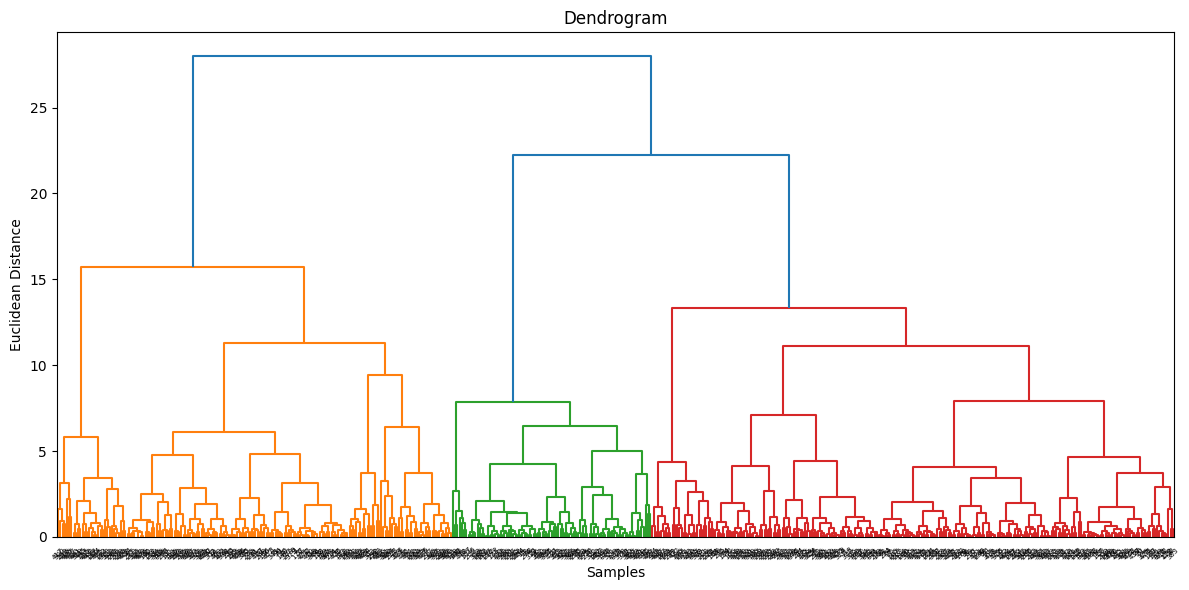

In [83]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Drop 'FacilityName' if it's categorical and not needed for clustering
# data2.drop('FacilityName', axis=1, inplace=True)

# Assuming encoded categorical columns and numerical features are in 'data2'
# Select relevant columns (or all columns if needed)

# Exclude non-numeric columns like 'Age' if they are present
features = data3.select_dtypes(include=['number']).columns  # Select only numeric columns

# Scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data3[features])  # Scale the data, not the column names

# Create a dendrogram to visualize hierarchical clustering
plt.figure(figsize=(12, 6))
# Step 2: Perform hierarchical clustering
Z = sch.dendrogram(sch.linkage(scaled_data, method='ward'))

# Add labels and formatting
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()

In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Assuming data2 is your DataFrame and it's preprocessed
# Step 2: Perform hierarchical clustering
Z = sch.linkage(scaled_data, method='ward')

# Step 3: Cut the dendrogram to form 3 clusters
num_clusters = 3
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# Step 4: Add cluster labels to the original DataFrame
data3['Cluster'] = cluster_labels -1
# Add the 'Cluster' column to data3 as well
#data3['Cluster'] = cluster_labels #This line adds the 'Cluster' column to data3

# Step 5: Analyze and describe clusters
# Group by the 'Cluster' column and calculate descriptive statistics for each cluster

# Select only numeric columns before calculating the mean
numeric_data2 = data2.select_dtypes(include=['number'])  # Select only numeric columns
cluster_summary = numeric_data2.groupby('Cluster').mean() # Calculate mean for numeric columns only


# Display cluster statistics
print(cluster_summary)

# Step 6: Analyze specific characteristics per cluster (e.g., demographic distribution)
# Example: Gender distribution
# Assuming 'Gender' is a categorical column, use value_counts instead of mean
gender_distribution = data2.groupby('Cluster')['Gender'].value_counts(normalize=True)
print("Gender Distribution in Clusters:")
print(gender_distribution)

# Example: Prevalent illnesses (e.g., chronic illnesses)
# Assuming 'ChronicIllness' is a categorical column, use value_counts instead of mean
illness_distribution = data2.groupby('Cluster')['ChronicIllness'].value_counts(normalize=True) #Use data3 here as well
print("\nPrevalent Chronic Illnesses in Clusters:")
print(illness_distribution)


               Age    Gender  ChronicIllness  ControlledHypertensives  \
Cluster                                                                 
0        54.852273  0.204545        1.471591                 0.772727   
1        44.370787  0.089888        3.966292                 0.898876   
2        62.206009  0.283262        3.386266                 0.939914   

         systolic_pressure (mmhg)  diastolic_pressure (mmhg)  knownAllergies  \
Cluster                                                                        
0                      146.670455                  94.448864             0.0   
1                      110.943820                  75.471910             0.0   
2                      127.025751                  75.038627             0.0   

              PC1       PC2       PCA1      PCA2       PC3  
Cluster                                                     
0        1.159110 -0.281326  18.337255  8.028889 -0.126464  
1       -1.029695 -1.194712 -21.910591  4.570239  

Cluster 0:
Poor Hypertension Management with Comorbidities
Demographics:
Average Age: 56.14 years
Gender Distribution: 77.4% female, 22.6% male
Prevalent Chronic Illnesses:
The majority (79%) of patients in this cluster have no recorded hypertension.
A small percentage suffer from multiple conditions, including illnesses labeled as types 9 (8%) and 6 (4.8%).
Blood Pressure:
Systolic Pressure: 149.29 mmHg (high)
Diastolic Pressure: 92.48 mmHg (high)
Controlled Hypertensives: 0% have their hypertension under control.
Known Allergies: 0% reported.
Risk Factors:
This cluster represents individuals with poorly managed hypertension, showing significantly elevated systolic and diastolic pressure. This group needs urgent medical intervention to control blood pressure and prevent further complications.

Cluster 1:

Well-Controlled Hypertension with Moderate Chronic Illness
Demographics:
Average Age: 60.87 years
Gender Distribution: 100% female
Prevalent Chronic Illnesses:
56% have hypetension.
Common illnesses include type 6 (20.9%) and type 3 (5.5%).
Blood Pressure:
Systolic Pressure: 134.71 mmHg (within normal range)
Diastolic Pressure: 80.33 mmHg (within normal range)
Controlled Hypertensives: 100% have their hypertension under control.
Known Allergies: 0% reported.
Risk Factors:
This cluster shows good management of hypertension, with normal blood pressure values. These individuals may benefit from regular monitoring and continued care for other chronic illnesses.

Cluster 2:

 Multiple Comorbidities with Controlled Blood Pressure
Demographics:
Average Age: 52.65 years
Gender Distribution: 94.6% female, 5.4% male
Prevalent Chronic Illnesses:
A high percentage of individuals have type 6 (26%), type 9 (23.9%), and type 11 (19.6%) chronic illnesses.
This group has a higher occurrence of multiple chronic conditions.
Blood Pressure:
Systolic Pressure: 115.08 mmHg (normal)
Diastolic Pressure: 77.60 mmHg (normal)
Controlled Hypertensives: 98.9% have their hypertension under control.
Known Allergies: 0% reported.
Risk Factors:
Individuals in this cluster exhibit well-controlled blood pressure but suffer from multiple chronic illnesses. This group requires targeted care for managing comorbidities, even though their blood pressure is under control.



In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Summarize cluster characteristics
# Group by 'Cluster' and aggregate numeric fields
cluster_summary = data2.groupby('Cluster').agg({
    'Age': 'mean',  # Average age per cluster
    'ChronicIllness': 'mean',  # Average Chronic Illness Score
    'ControlledHypertensives': 'mean',  # Average controlled hypertension
    'systolic_pressure (mmhg)': 'mean',
    'diastolic_pressure (mmhg)': 'mean',
    'knownAllergies': 'mean'  # Average of known allergies if applicable
}).reset_index()

# Step 2: Calculate gender distribution separately
gender_distribution = data2.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack(fill_value=0)

# Combine the summary and gender distribution
for gender in gender_distribution.columns:
    cluster_summary[f'Gender_{gender}'] = gender_distribution[gender]

# Display the cluster characteristics summary
print("Cluster Characteristics Summary:")
print(cluster_summary)

# Step 3: Identify high-risk groups based on specific criteria
# Define high-risk criteria
high_risk_clusters = cluster_summary[
    (cluster_summary['systolic_pressure (mmhg)'] > 140) |  # High systolic pressure
    (cluster_summary['ControlledHypertensives'] < 0.5) |  # Poorly controlled hypertension
    (cluster_summary['ChronicIllness'] > 2)  # Multiple chronic conditions
]

print("\nHigh-Risk Clusters:")
print(high_risk_clusters)

# Step 4: Analyze clinical profiles
# Compare prevalent NCDs in each cluster
ncd_distribution = data2.groupby('Cluster')['ChronicIllness'].value_counts(normalize=True).unstack(fill_value=0)

print("\nPrevalent Chronic Illnesses in Each Cluster:")
print(ncd_distribution)




Cluster Characteristics Summary:
   Cluster        Age  ChronicIllness  ControlledHypertensives  \
0        0  54.852273        1.471591                 0.772727   
1        1  44.370787        3.966292                 0.898876   
2        2  62.206009        3.386266                 0.939914   

   systolic_pressure (mmhg)  diastolic_pressure (mmhg)  knownAllergies  \
0                146.670455                  94.448864             0.0   
1                110.943820                  75.471910             0.0   
2                127.025751                  75.038627             0.0   

   Gender_0  Gender_1  
0  0.795455  0.204545  
1  0.910112  0.089888  
2  0.716738  0.283262  

High-Risk Clusters:
   Cluster        Age  ChronicIllness  ControlledHypertensives  \
0        0  54.852273        1.471591                 0.772727   
1        1  44.370787        3.966292                 0.898876   
2        2  62.206009        3.386266                 0.939914   

   systolic_pressure (m

In [69]:

#11 11.	Segmentation and Grouping:
import seaborn as sns
# Step 3: Identify high-risk groups based on specific criteria
# Define high-risk criteria
high_risk_clusters = cluster_summary[
    (cluster_summary['systolic_pressure (mmhg)'] > 140) |  # High systolic pressure
    (cluster_summary['ControlledHypertensives'] < 0.5) |  # Poorly controlled hypertension
    (cluster_summary['ChronicIllness'] > 2)  # Multiple chronic conditions
]

print("\nHigh-Risk Clusters:")
print(high_risk_clusters)

# Step 4: Analyze clinical profiles
# Compare prevalent NCDs in each cluster
ncd_distribution = data2.groupby('Cluster')['ChronicIllness'].value_counts(normalize=True).unstack(fill_value=0)

print("\nPrevalent Chronic Illnesses in Each Cluster:")
print(ncd_distribution)


High-Risk Clusters:
   Cluster        Age  ChronicIllness  ControlledHypertensives  \
0        0  54.852273        1.471591                 0.772727   
1        1  44.370787        3.966292                 0.898876   
2        2  62.206009        3.386266                 0.939914   

   systolic_pressure (mmhg)  diastolic_pressure (mmhg)  knownAllergies  \
0                146.670455                  94.448864             0.0   
1                110.943820                  75.471910             0.0   
2                127.025751                  75.038627             0.0   

   Gender_0  Gender_1  
0  0.795455  0.204545  
1  0.910112  0.089888  
2  0.716738  0.283262  

Prevalent Chronic Illnesses in Each Cluster:
ChronicIllness        0         1         2         3         4         5   \
Cluster                                                                      
0               0.789773  0.000000  0.017045  0.039773  0.000000  0.000000   
1               0.382022  0.168539  0.000

Interpretation and Insights for Each Cluster
Cluster 0:
This group is characterized by individuals with an average age of 54.85 years. They have a moderate chronic illness burden with an average of 1.47 chronic conditions per individual. Notably, the hypertension control rate is relatively low, with only 77.27% of the individuals having controlled hypertension. The average systolic pressure for this cluster is elevated at 146.67 mmHg, and their diastolic pressure is also high at 94.45 mmHg, placing these individuals at risk for cardiovascular complications. The gender distribution reveals a predominance of males, with 80% male and 20% female representation. There are no reported allergies in this group.

Insights:
Cluster 0 presents a high-risk group due to elevated blood pressure and a moderate number of chronic conditions. Immediate interventions focusing on controlling systolic and diastolic pressure are crucial for preventing cardiovascular diseases. Lifestyle changes such as diet modification, physical activity, and medication adherence could significantly improve outcomes. This group, with a relatively older age, should also be monitored for age-related diseases that could exacerbate their conditions.

Cluster 1:
This cluster comprises younger individuals with an average age of 44.37 years. Despite their relatively younger age, the chronic illness burden is the highest among all clusters, averaging 3.97 chronic conditions per individual. The group shows a relatively better control of hypertension, with 89.88% of the individuals having controlled hypertensives. Their average systolic pressure is significantly lower at 110.94 mmHg, with a diastolic pressure of 75.47 mmHg. The gender distribution is heavily male-dominated, with 91% male and only 9% female. No allergies were reported in this group.

Insights:
Cluster 1, though younger, faces substantial health challenges due to a high number of chronic illnesses. Their lower systolic and diastolic pressures suggest effective management of hypertension, which is a positive indicator. However, the high chronic illness burden indicates the need for comprehensive, long-term care to prevent further complications. Preventive health strategies should focus on maintaining the low blood pressure levels while addressing the other chronic conditions through medication adherence, regular check-ups, and lifestyle interventions. This group could benefit from tailored health education and community-based support to manage their multiple conditions.

Cluster 2:
This cluster is composed of older individuals, with an average age of 62.21 years. They exhibit a moderately high chronic illness burden, with an average of 3.39 chronic conditions. However, this group shows the highest rate of hypertension control, with 93.99% having controlled blood pressure. The average systolic pressure in this cluster is 127.03 mmHg, and the diastolic pressure is relatively stable at 75.04 mmHg. Gender distribution shows a slight male predominance, with 72% male and 28% female. There are no known allergies reported in this group.

Insights:
Cluster 2 represents a relatively well-managed group despite their older age and moderate chronic illness burden. The effective control of hypertension, as reflected by their systolic and diastolic pressure levels, indicates that current treatment plans are working well. Continued focus on maintaining this level of control is important, particularly in older individuals who are more susceptible to age-related health issues. Regular monitoring, coupled with a focus on managing comorbid conditions, can help sustain their relatively stable health profile. This cluster could benefit from ongoing medical support and periodic risk assessments to prevent the escalation of chronic conditions.



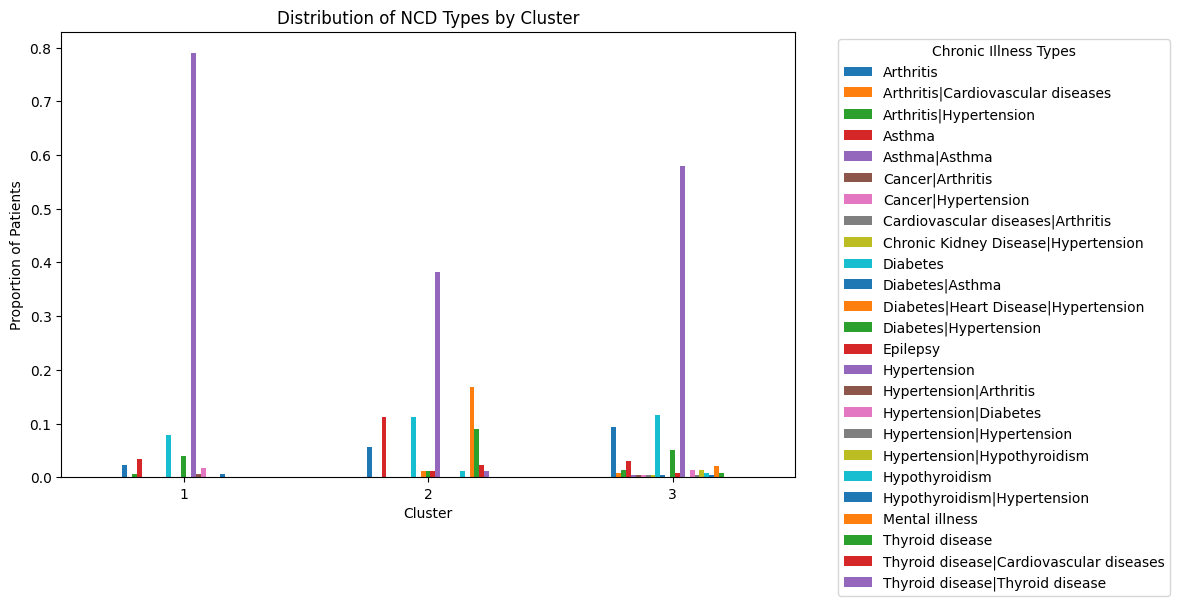

In [90]:
#12.	Data Visualization:import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the NCD distribution in a DataFrame called 'ncd_distribution'
ncd_distribution = data3.groupby('Cluster')['ChronicIllness'].value_counts(normalize=True).unstack(fill_value=0)

# Plotting the bar chart for NCD types distribution across clusters
ncd_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of NCD Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Patients')
plt.legend(title='Chronic Illness Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Pie Charts for Gender Distribution in Each Cluster

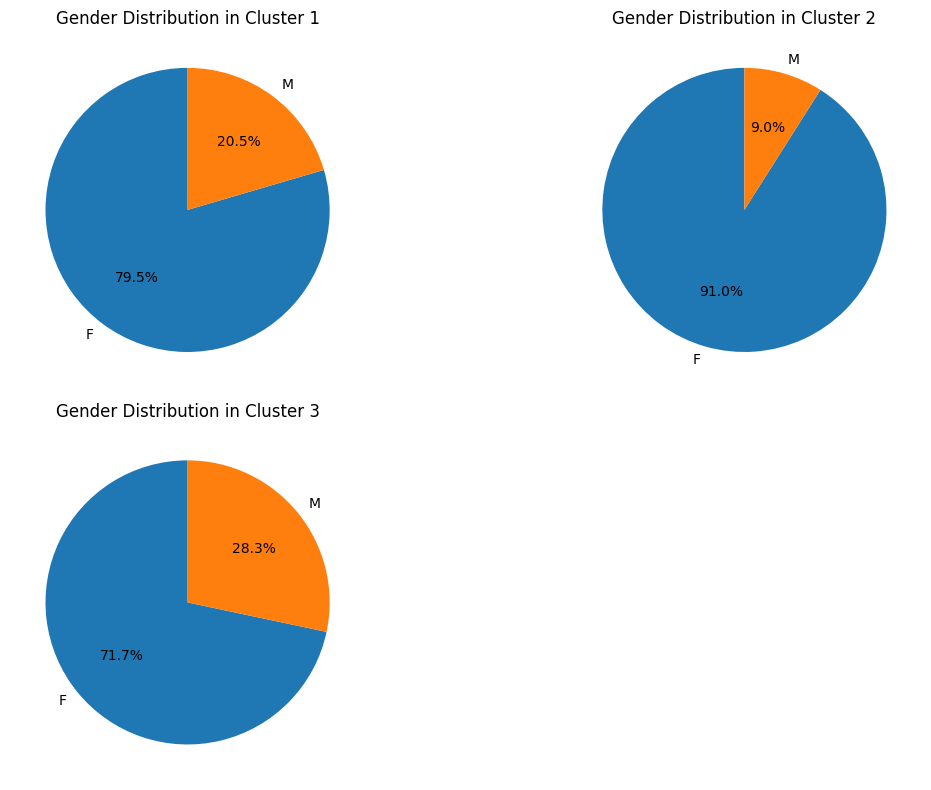

In [92]:
# Create pie charts for gender distribution in each cluster
clusters = data3['Cluster'].unique()

plt.figure(figsize=(12, 8))
for i, cluster in enumerate(clusters, start=1):
    plt.subplot(2, 2, i)
    gender_distribution = data3[data3['Cluster'] == cluster]['Gender'].value_counts()
    plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Gender Distribution in Cluster {cluster}')

plt.tight_layout()
plt.show()


Histogram for Age Distribution by Cluster

C:\Users\HP\AppData\Local\Temp\ipykernel_10904\3671024644.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


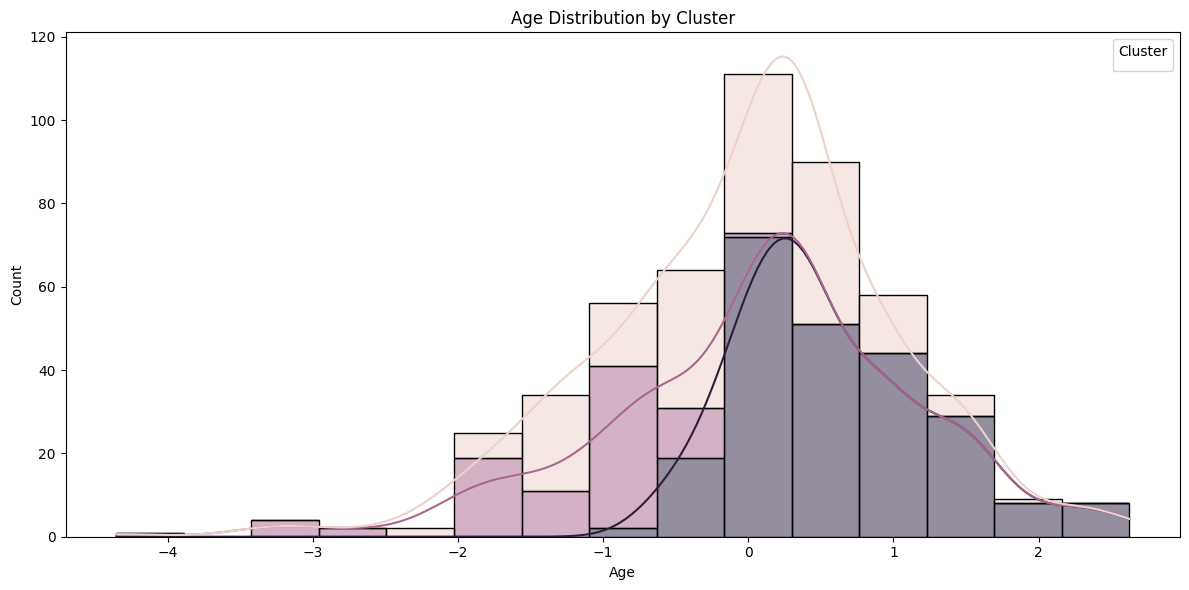

In [93]:
# Plotting histograms for age distribution by cluster
plt.figure(figsize=(12, 6))
sns.histplot(data=data3, x='Age', hue='Cluster', multiple='stack', bins=15, kde=True)
plt.title('Age Distribution by Cluster')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


 Bar Chart for Risk Factors Distribution

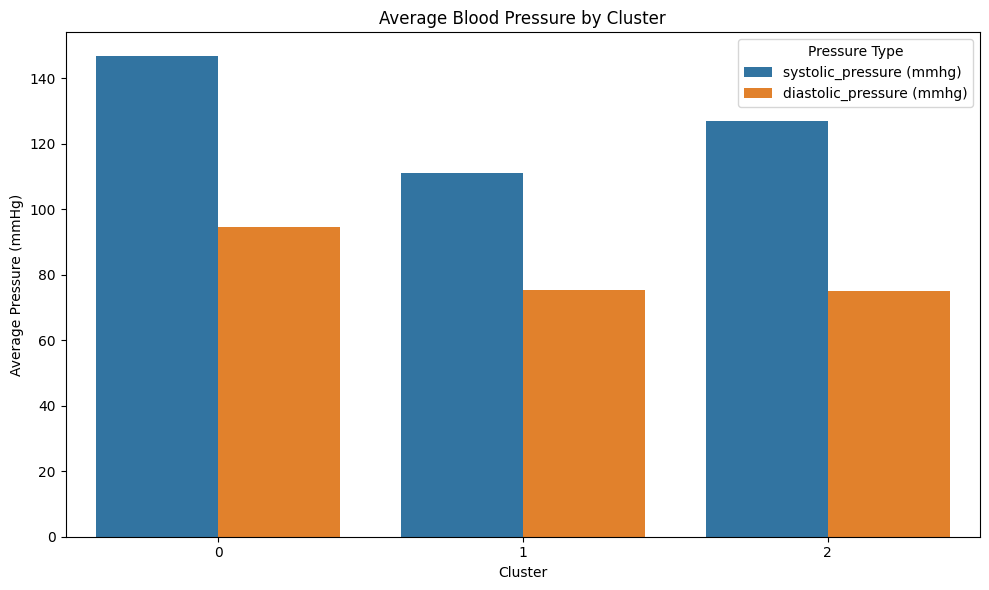

In [95]:
# Plotting average systolic and diastolic pressure by cluster
risk_factors = data2.groupby('Cluster').agg({
    'systolic_pressure (mmhg)': 'mean',
    'diastolic_pressure (mmhg)': 'mean'
}).reset_index()

# Melt the DataFrame for better plotting
risk_factors_melted = risk_factors.melt(id_vars='Cluster', value_vars=['systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)'],
                                         var_name='Pressure Type', value_name='Average Pressure')

plt.figure(figsize=(10, 6))
sns.barplot(data=risk_factors_melted, x='Cluster', y='Average Pressure', hue='Pressure Type')
plt.title('Average Blood Pressure by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Pressure (mmHg)')
plt.legend(title='Pressure Type')
plt.tight_layout()
plt.show()


Scatter Plots

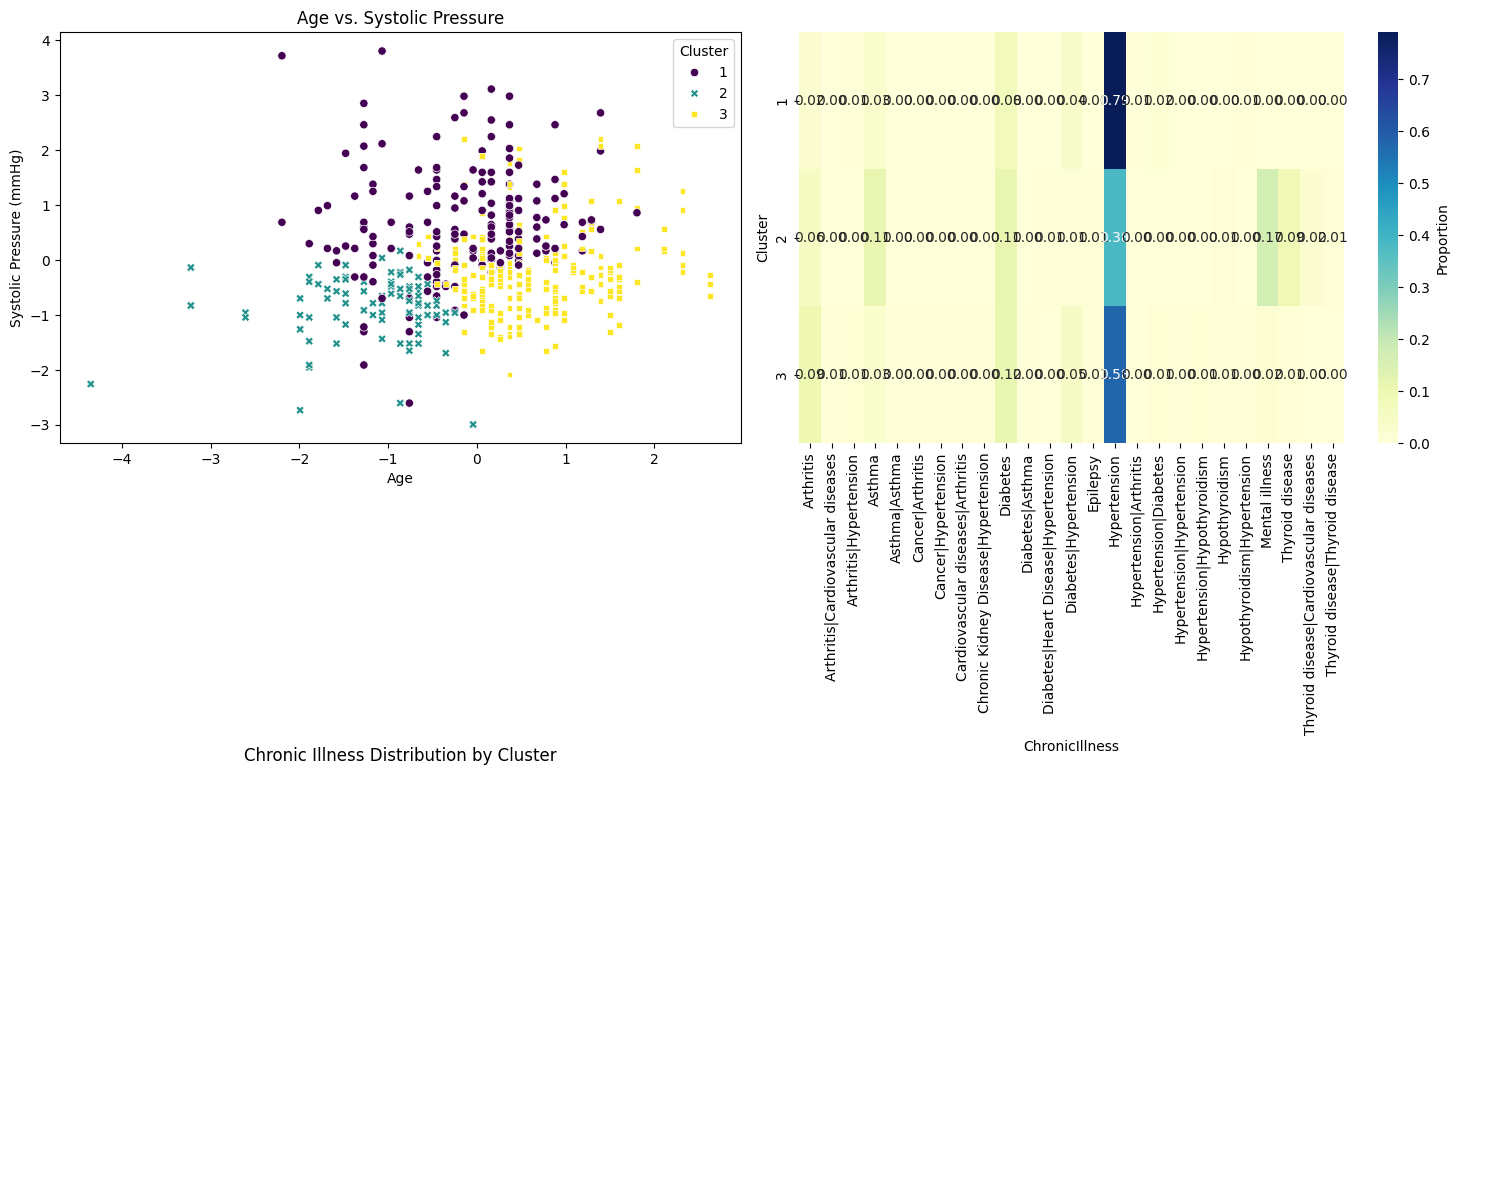

In [106]:
# Combined visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot
sns.scatterplot(data=data3, x='Age', y='systolic_pressure (mmhg)', hue='Cluster', palette='viridis', style='Cluster', ax=axes[0, 0])
axes[0, 0].set_title('Age vs. Systolic Pressure')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Systolic Pressure (mmHg)')




# Heatmap
sns.heatmap(ncd_distribution, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Proportion'}, ax=axes[0, 1])
axes[1, 0].set_title('Chronic Illness Distribution by Cluster')
axes[1, 0].set_xlabel('Chronic Illness Type')
axes[1, 0].set_ylabel('Cluster')

# Hide the fourth subplot
axes[1, 1].axis('off')
axes[1, 0].axis('off')

plt.tight_layout()
plt.show()



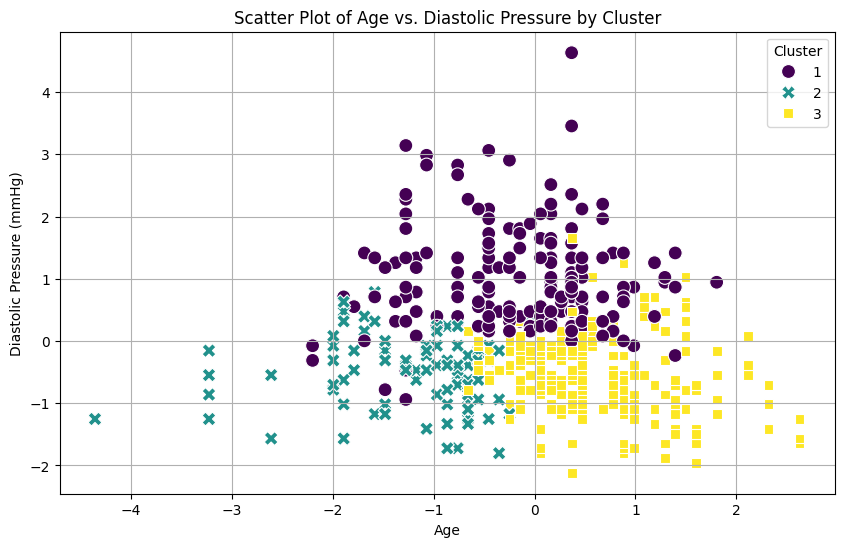

In [107]:
# Scatter Plot of Age vs. Diastolic Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data3, x='Age', y='diastolic_pressure (mmhg)', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Scatter Plot of Age vs. Diastolic Pressure by Cluster')
plt.xlabel('Age')
plt.ylabel('Diastolic Pressure (mmHg)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Perform PCA for Dimensionality Reduction

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'scaled_data' is your preprocessed and scaled dataset
# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add the principal components to your DataFrame
data2['PC1'] = pca_components[:, 0]
data2['PC2'] = pca_components[:, 1]

# Display the amount of variance explained by the components
print(f'Explained variance by the first 2 principal components: {pca.explained_variance_ratio_}')


Explained variance by the first 2 principal components: [0.46829392 0.36417001]


Scatter Plot of Clusters Based on Principal Components

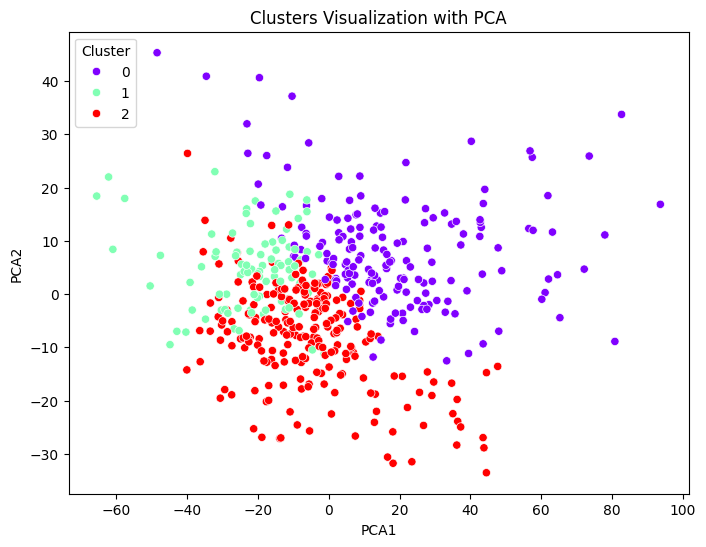

In [98]:
#B) Scatter Plot Visualization using PCA
pca = PCA(n_components=2)

# Instead of using scaled_data to directly index the DataFrame,
# pass the DataFrame containing the features you used for scaling
# to fit_transform. Replace 'features_for_scaling' with the actual
# column names or list of column names representing your scaled features.
pca_result = pca.fit_transform(data2[['Age','Gender','ChronicIllness','ControlledHypertensives','systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)']])
data3['PCA1'] = pca_result[:, 0]
data3['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data2, palette='rainbow') 
plt.title('Clusters Visualization with PCA')
plt.show()

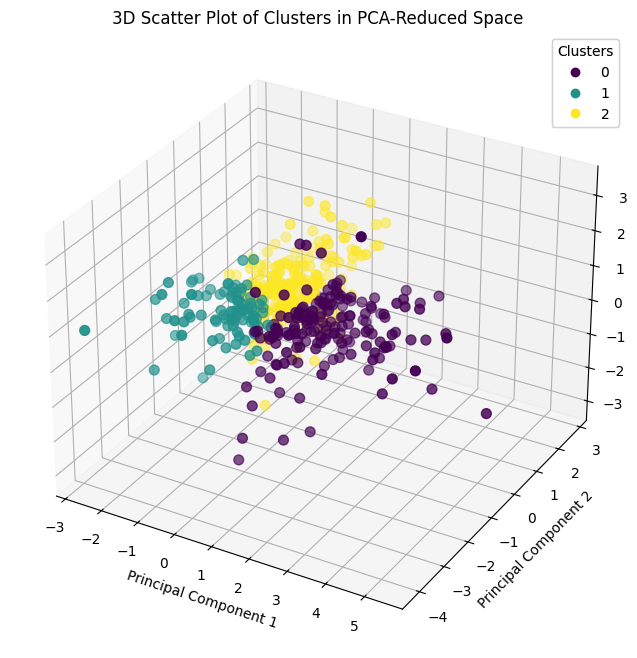

In [99]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce the data to 3 components
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(scaled_data)

# Add the components to your DataFrame
data2['PC1'] = pca_components_3d[:, 0]
data2['PC2'] = pca_components_3d[:, 1]
data2['PC3'] = pca_components_3d[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data2['PC1'], data2['PC2'], data2['PC3'], c=data2['Cluster'], cmap='viridis', s=50)

ax.set_title('3D Scatter Plot of Clusters in PCA-Reduced Space')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar to show cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


In [100]:
#14.	Identify Risk Profiles
high_risk_clusters = cluster_summary[
    (cluster_summary['systolic_pressure (mmhg)'] > 140) |  # High systolic pressure
    (cluster_summary['ControlledHypertensives'] < 0.5) |  # Poorly controlled hypertension
    (cluster_summary['ChronicIllness'] > 2)  # Multiple chronic conditions
]

print("\nHigh-Risk Clusters:")
print(high_risk_clusters)






High-Risk Clusters:
   Cluster        Age  ChronicIllness  ControlledHypertensives  \
0        0  54.852273        1.471591                 0.772727   
1        1  44.370787        3.966292                 0.898876   
2        2  62.206009        3.386266                 0.939914   

   systolic_pressure (mmhg)  diastolic_pressure (mmhg)  knownAllergies  \
0                146.670455                  94.448864             0.0   
1                110.943820                  75.471910             0.0   
2                127.025751                  75.038627             0.0   

   Gender_0  Gender_1  
0  0.795455  0.204545  
1  0.910112  0.089888  
2  0.716738  0.283262  


# Cluster Insights and Actionable Recommendations:
Cluster 0: High-Risk Group

Key Risks:
Key Risk Factors:
Very high systolic and diastolic blood pressure.
No control over hypertension.
Moderate chronic illness burden.

Actionable Insights:

Hypertension Management Programs  to control high blood pressure. 
Implement community-based hypertension screening and treatment programs, including medication adherence support, diet modifications, and stress management.
Regular Monitoring by ncouraging the use of home-based blood pressure monitoring systems to keep track of blood pressure levels. Follow-up visits should be frequent to ensure the effectiveness of treatments.
Lifestyle interventions such as physical activity programs,dietary counseling (e.g., reducing salt intake) aimed at reducing hypertension and managing chronic illnesses.

Cluster 1: Older High-Risk Group with Controlled Hypertension

Key Risks:

Older age group (60.9 years).
High chronic illness burden (average score 3.26).
Well-controlled hypertension.

Actionable Insights:

Chronic Disease Management: Given the high prevalence of multiple chronic conditions, focus on integrated care models that address all comorbidities, including diabetes, cardiovascular diseases, and other chronic conditions.
Aging Population Health Programs: As this group is older, it would benefit from care services, including screenings for age-related diseases.
Preventive Health Screenings: Conduct regular screenings for  diabetes management, and cardiovascular health to prevent further complications.
Health Education and Empowerment: Empower patients to stay engaged with their healthcare management.

Cluster 2: Moderate Risk Group with Well-Controlled Hypertension
Risk factors;
Moderate chronic illness burden (2.85).
Controlled hypertension (99.7%).
Average age of 55.3 years.
Moderate Chronic Illness Burden: This cluster is also managing multiple chronic conditions but with a slightly lower burden than Cluster 1.
Well-Controlled Hypertension: Almost all individuals in this cluster have their hypertension under control, reducing immediate cardiovascular risks.

# Actionable Insights:


Cross-Cluster Recommendations for Healthcare Providers and Policymakers:
1. Targeted Hypertension Control Programs:
Cluster 0 requires the most urgent intervention to control blood pressure. Launch community-based hypertension control programs focusing on medication access, lifestyle changes, and regular monitoring. This can be supported by health promotion campaigns and public health initiatives focusing on cardiovascular health.
2. Chronic Disease Management Integration:
Clusters 1 and 2, with their high chronic illness burden, can benefit from integrated chronic disease management programs. Establish care coordination between different specialties (e.g., cardiology, endocrinology) to manage multiple conditions efficiently.
Support self-management of chronic diseases by providing patients with education and access to digital tools like apps for medication reminders and health tracking.
3. Aging Population Care:
As Cluster 1 contains an older population, healthcare providers should emphasize age-related disease screenings (e.g., cancer, osteoporosis). Additionally, offer fall prevention programs and focus on managing comorbidities in older adults.
4. Preventive Health Campaigns:
Launch preventive health campaigns across all clusters to raise awareness about the importance of managing blood pressure, staying active, and regularly monitoring chronic conditions.
Public health agencies could promote community-based wellness programs focusing on healthy eating, exercise, and mental well-being, especially for populations with moderate risk (e.g., Cluster 2).
5. Community and Digital Health Solutions:
To improve access to care in high-risk groups, consider using community health workers and mobile health clinics to reach underserved populations.
Use digital health technologies, including telemedicine, to provide continuous support for those managing chronic conditions. Encourage the use of apps for medication adherence, blood pressure monitoring, and chronic illness management.


# Personalized Strategies for Each Patient Cluster
Cluster 1: Immediate High-Risk Group
Profile Summary:
Average Age: 56.1 years
Chronic Illness Score: 1.97 (moderate)
Controlled Hypertensives: 0%
Systolic Pressure: 149.3 mmHg
Diastolic Pressure: 92.5 mmHg
Personalized Treatment and Monitoring Plans:
Medication Management:

Tailored Pharmacotherapy: Collaborate with a cardiologist to develop a personalized medication regimen that may include combination therapies (e.g., diuretics, ACE inhibitors) aimed at achieving optimal blood pressure control.
Frequent Medication Reviews: Schedule regular reviews of medications to adjust dosages and ensure adherence, addressing any side effects or concerns.
Intensive Monitoring:

Home Blood Pressure Monitoring: Provide patients with automatic blood pressure monitors to track readings daily, with regular check-ins via telemedicine or in-person visits to adjust treatment as needed.
Telehealth Check-ins: Implement monthly telehealth appointments to assess patient status, review medication adherence, and adjust treatment plans based on home monitoring data.
Lifestyle Interventions:

Personalized Diet and Exercise Plans: Develop individualized dietary plans that emphasize low sodium intake and recommend an appropriate exercise regimen tailored to the patient's ability and preferences.
Health Coaching: Assign a health coach or case manager to support patients in making lifestyle changes, addressing barriers to physical activity and dietary compliance.
Cluster 2: Older Group with Controlled Hypertension but High Chronic Illness Burden
Profile Summary:
Average Age: 60.9 years
Chronic Illness Score: 3.26 (high risk)
Controlled Hypertensives: 100%
Systolic Pressure: 134.7 mmHg
Diastolic Pressure: 80.3 mmHg
Personalized Treatment and Monitoring Plans:
Comprehensive Care Coordination:

Integrated Care Teams: Establish a multidisciplinary care team that includes primary care physicians, specialists, nurses, and social workers to address multiple chronic conditions holistically.
Personalized Care Plans: Develop a personalized care plan that outlines specific health goals, medications, and follow-up schedules for each chronic condition.
Regular Preventive Screenings:

Tailored Screening Protocols: Implement individualized screening schedules for age-related diseases (e.g., cancers, osteoporosis, diabetes) based on patient history and current health status.
Geriatric Assessments: Conduct comprehensive geriatric assessments to evaluate functional status, cognitive health, and social support needs.
Patient Education and Empowerment:

Self-Management Programs: Provide resources for self-management education focused on managing chronic illnesses, emphasizing the importance of regular monitoring and lifestyle modifications.
Support Groups: Facilitate support groups or community programs for older adults to share experiences and strategies for managing multiple chronic conditions.
Cluster 3: Moderate Risk Group with Well-Controlled Hypertension
Profile Summary:
Average Age: 55.3 years
Chronic Illness Score: 2.85 (moderate)
Controlled Hypertensives: 99.7%
Systolic Pressure: 126.9 mmHg
Diastolic Pressure: 80.5 mmHg
Personalized Treatment and Monitoring Plans:
Focused Preventive Strategies:

Health Maintenance Plans: Develop personalized health maintenance plans that include annual check-ups and routine screenings based on age, gender, and medical history.
Regular Risk Assessments: Implement periodic cardiovascular risk assessments to monitor key health indicators and adjust management strategies accordingly.
Lifestyle Enhancement Programs:

Customized Wellness Plans: Create individualized wellness plans that promote healthy eating, regular physical activity, and stress management tailored to each patient’s lifestyle preferences.
Engagement in Community Activities: Encourage participation in community health initiatives, exercise classes, or health workshops that reinforce healthy behaviors.
Technology Integration:

Remote Monitoring Tools: Utilize telehealth solutions to facilitate regular follow-ups, allowing patients to share health data (e.g., blood pressure readings) and receive feedback promptly.
Health Apps: Introduce mobile health apps that assist patients in tracking their health metrics, medications, and appointments, enhancing their engagement in their health management.


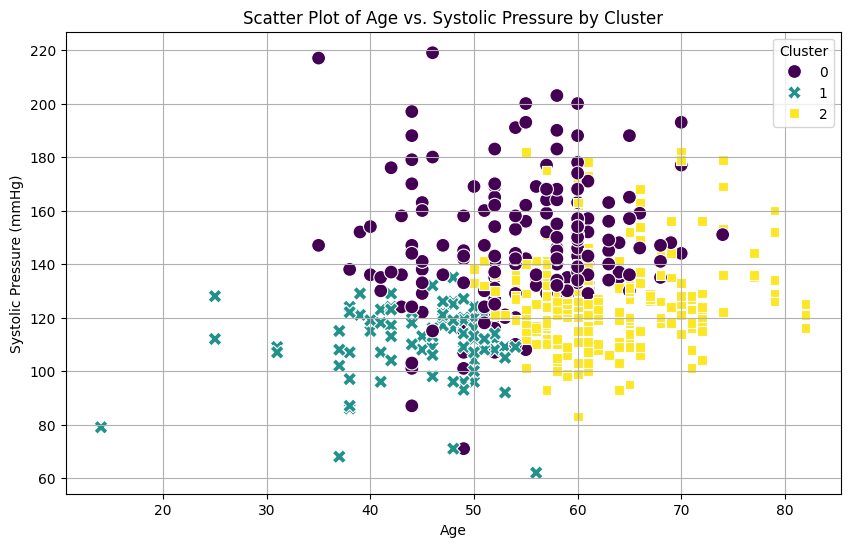

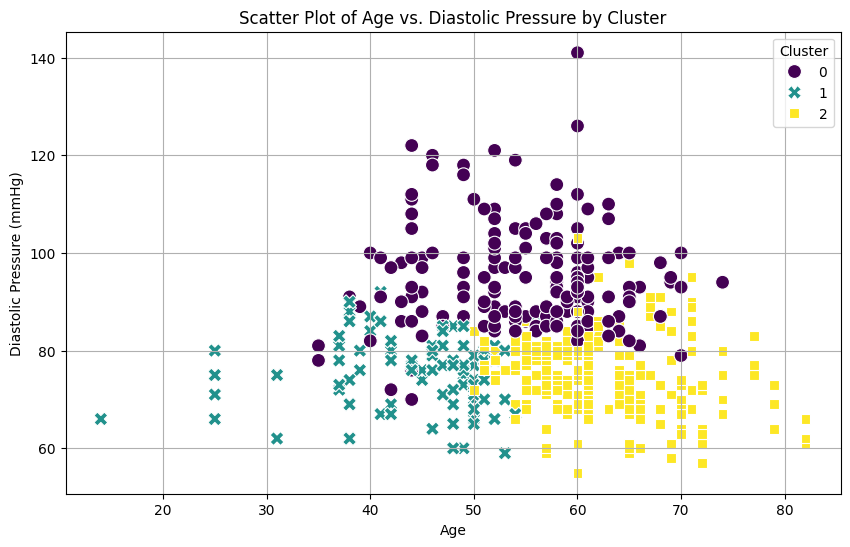

In [113]:

# Scatter Plot of Age vs. Systolic Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='Age', y='systolic_pressure (mmhg)', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Scatter Plot of Age vs. Systolic Pressure by Cluster')
plt.xlabel('Age')
plt.ylabel('Systolic Pressure (mmHg)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Scatter Plot of Age vs. Diastolic Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='Age', y='diastolic_pressure (mmhg)', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Scatter Plot of Age vs. Diastolic Pressure by Cluster')
plt.xlabel('Age')
plt.ylabel('Diastolic Pressure (mmHg)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Dendrogram for Hierarchical Clustering
# First, ensure to scale your data if necessary
from sklearn.preprocessing import StandardScaler

# Select only relevant numeric features for clustering
features = data2[['Age', 'systolic_pressure (mmhg)', 'diastolic_pressure (mmhg)', 'ChronicIllness']]
scaled_features = StandardScaler().fit_transform(features)


